In [1]:
#Data Preprocessing

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the paths to your training and validation datasets
train_data_dir = 'D:/AMITY/NTCC-3 (INTERNSHIP) 2023/AI/Dataset/Training'
val_data_dir = 'D:/AMITY/NTCC-3 (INTERNSHIP) 2023/AI/Dataset/Validation'

# Set batch size
batch_size = 32

# Define image data generators with resizing
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Flow training images in batches using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',  # Use 'categorical' for one-hot encoding
    subset='training'
)

# Flow validation images in batches using val_datagen generator
val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 125 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


In [2]:
#Create and Initialize ResNet-50 Model

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

num_classes=3
# Load the pre-trained ResNet-50 model without top layers
pretrained_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in pretrained_model.layers:
    layer.trainable = False

# Build the custom top layers
x = GlobalAveragePooling2D()(pretrained_model.output)
x = Dense(1000, activation='relu')(x)  # Add additional dense layer if needed
predictions = Dense(num_classes, activation='softmax')(x)  # Assuming 'num_classes' is 3 in your case

# Create the model
model = Model(inputs=pretrained_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


In [3]:
#Train the Model

# Train the model on your H&E stained liver tissue dataset
model.fit(train_generator, epochs=10, validation_data=val_generator)

Epoch 1/10
4/4 [==============================] - 21s 4s/step - loss: 1.7984 - accuracy: 0.2720 - val_loss: 1.9485 - val_accuracy: 0.4333
Epoch 2/10
4/4 [==============================] - 13s 3s/step - loss: 1.4713 - accuracy: 0.4240 - val_loss: 2.2445 - val_accuracy: 0.4333
Epoch 3/10
4/4 [==============================] - 12s 3s/step - loss: 1.9322 - accuracy: 0.4000 - val_loss: 1.3569 - val_accuracy: 0.2667
Epoch 4/10
4/4 [==============================] - 12s 3s/step - loss: 1.6768 - accuracy: 0.2720 - val_loss: 1.3835 - val_accuracy: 0.4333
Epoch 5/10
4/4 [==============================] - 13s 3s/step - loss: 1.2402 - accuracy: 0.4080 - val_loss: 1.2259 - val_accuracy: 0.4333
Epoch 6/10
4/4 [==============================] - 12s 3s/step - loss: 1.2755 - accuracy: 0.4400 - val_loss: 1.1649 - val_accuracy: 0.3000
Epoch 7/10
4/4 [==============================] - 12s 3s/step - loss: 1.0410 - accuracy: 0.4640 - val_loss: 1.0477 - val_accuracy: 0.3333
Epoch 8/10
4/4 [==================

In [4]:
#Evaluate the Model

# Assuming you have a separate test dataset
test_data_dir = 'D:/AMITY/NTCC-3 (INTERNSHIP) 2023/AI/Dataset/Testing'
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

# Evaluate the model
evaluation = model.evaluate(test_generator)
print("Test Accuracy:", evaluation[1])


Found 156 images belonging to 3 classes.
5/5 [==============================] - 13s 2s/step - loss: 1.3187 - accuracy: 0.4231
Test Accuracy: 0.42307692766189575


In [5]:
#Fine-Tuning

# Unfreeze some layers for fine-tuning
for layer in model.layers[:100]:
    layer.trainable = True

# Recompile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model
model.fit(train_generator, epochs=10, validation_data=val_generator)


Epoch 1/10
4/4 [==============================] - 50s 10s/step - loss: 1.1744 - accuracy: 0.5040 - val_loss: 1.3263 - val_accuracy: 0.4333
Epoch 2/10
4/4 [==============================] - 36s 9s/step - loss: 0.5472 - accuracy: 0.7760 - val_loss: 1.3096 - val_accuracy: 0.4333
Epoch 3/10
4/4 [==============================] - 37s 9s/step - loss: 0.3221 - accuracy: 0.9040 - val_loss: 1.3281 - val_accuracy: 0.3667
Epoch 4/10
4/4 [==============================] - 37s 9s/step - loss: 0.2336 - accuracy: 0.9520 - val_loss: 1.3669 - val_accuracy: 0.4333
Epoch 5/10
4/4 [==============================] - 37s 9s/step - loss: 0.2136 - accuracy: 0.9680 - val_loss: 1.3420 - val_accuracy: 0.4333
Epoch 6/10
4/4 [==============================] - 38s 9s/step - loss: 0.1238 - accuracy: 1.0000 - val_loss: 1.3555 - val_accuracy: 0.4333
Epoch 7/10
4/4 [==============================] - 37s 9s/step - loss: 0.1071 - accuracy: 1.0000 - val_loss: 1.3627 - val_accuracy: 0.4333
Epoch 8/10
4/4 [=================

In [6]:
#Preprocess the Test Image

from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess the test image
test_image_path = "D:/AMITY/NTCC-3 (INTERNSHIP) 2023/AI/Dataset/Testing/Steatohepatitis/67.jpg"
test_image = image.load_img(test_image_path, target_size=(224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image /= 255.0  # Normalize pixel values

#make predictions
predictions = model.predict(test_image)

#interpret predictions

predicted_class = np.argmax(predictions)
class_labels = {0: 'Normal Liver', 1: 'Steatohepatitis', 2: 'Steatosis'}
predicted_label = class_labels[predicted_class]

print(predictions)
print(predicted_class)
print(f'The predicted class is: {predicted_label}')


1/1 [==============================] - 2s 2s/step
[[0.40412164 0.11134581 0.4845326 ]]
2
The predicted class is: Steatosis


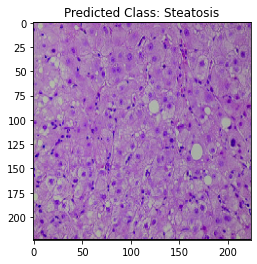

In [7]:
#visualization

import matplotlib.pyplot as plt

# Display the test image
plt.imshow(test_image[0])
plt.title(f'Predicted Class: {predicted_label}')
plt.show()